In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
location_of_data = "/content/drive/MyDrive/BuddiAI/images"
listdir(location_of_data)

['27.png',
 '867.png',
 '873.png',
 '683.png',
 '33.png',
 '481.xml',
 '697.png',
 'nist_r0300_01.png',
 '495.xml',
 'pcw43c00-page02_2.png',
 '708.png',
 '720.png',
 '250.xml',
 'nist_r0420_01.png',
 'nky33f00-page02_2.png',
 '522.xml',
 '244.xml',
 '734.png',
 '278.xml',
 'nist_r0443_01.xml',
 'nist_r0371_01.png',
 '536.xml',
 'nist_r0312_01.xml',
 '913.png',
 'nzy64f00-var_1.xml',
 '287.xml',
 '907.png',
 '708.xml',
 '244.png',
 '250.png',
 'nist_r0371_01.xml',
 '536.png',
 '293.xml',
 'nist_r0420_01.xml',
 '734.xml',
 '522.png',
 'pcw43c00-page02_2.xml',
 '907.xml',
 '278.png',
 'nky33f00-page02_2.xml',
 '720.xml',
 'X_100.xml',
 '293.png',
 '913.xml',
 '287.png',
 'nist_r0312_01.png',
 'nzy64f00-var_1.png',
 'nist_r0408_01.xml',
 'X_114.xml',
 'nist_r0359_01.xml',
 'nist_r0347_01.png',
 'nist_r0416_01.png',
 'nist_r0443_01.png',
 'nist_r0324_01.xml',
 '721.xml',
 '292.png',
 '906.xml',
 '279.png',
 'X_115.xml',
 'X_113.jpeg',
 'nist_r0508_01.xml',
 '286.png',
 '912.xml',
 'nist_r0

In [ ]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

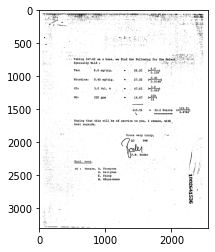

In [ ]:
 base_path = "/images/"
 sample_image = "1.png"
 image = read_image(base_path+sample_image)
 plt.imshow(image)
 plt.show()

In [ ]:
from detecto.core import Dataset
dataset = Dataset(base_path)

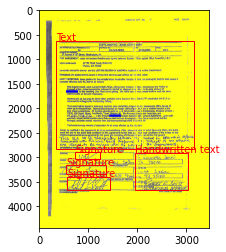

In [ ]:
from detecto.visualize import show_labeled_image
image,targets = dataset[0]
show_labeled_image(image,targets['boxes'], targets['labels'])

In [ ]:
box = targets['boxes']

In [ ]:
print(box.shape)

torch.Size([2, 4])


In [ ]:
from detecto.core import DataLoader, Model
labels = ['text', 'Signature','Handwritten text','Text','signature']
model = Model(labels)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
loader= DataLoader(dataset, batch_size=2, shuffle=True)#L3
model = Model(['text', 'Signature','Handwritten text','Text','signature', "'"])#L4
losses = model.fit(loader, dataset, epochs=1, lr_step_size=5, learning_rate=0.001, verbose=True)#L5

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 1
Begin iterating over training dataset


  0%|          | 2/644 [01:31<8:03:20, 45.17s/it]

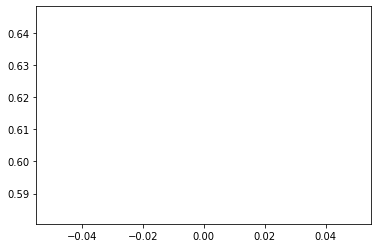

In [ ]:
plt.plot(losses)

In [ ]:
image = read_image(base_path+"7.png")
labels, boxes, scores = model.predict(image)

In [ ]:
print("labels", labels)
print("boxes", boxes)
print("scores", scores)

labels ['Text', 'Text', 'Text', 'Signature', 'Signature', 'Text', 'Text', 'Text', 'Text', 'Handwritten text', 'Signature', 'Signature', 'Signature', 'Signature', 'Handwritten text', 'Text', 'Handwritten text', 'Text', 'Text', 'Text', 'Text', 'Text', 'Handwritten text', 'Handwritten text', 'Handwritten text', 'Signature', 'Text', 'Text', 'Text', 'Text', 'Handwritten text', 'Signature', 'Handwritten text', 'Handwritten text', 'Handwritten text']
boxes tensor([[ 333.9149,  512.6488, 2223.7371, 2585.5627],
        [1964.6185,  257.5763, 2357.5662,  695.5249],
        [ 383.8354, 2638.6011, 1216.5719, 2828.4727],
        [ 331.5692, 2409.9570, 1233.7595, 2630.8879],
        [2113.0469, 2781.1780, 2372.8442, 2980.2249],
        [ 353.3521, 2694.3428, 1186.4338, 2794.2776],
        [ 271.9682,  249.6330, 2275.6067,  575.1549],
        [1774.1975, 2559.6013, 1960.8280, 3046.8079],
        [ 339.8705, 2497.5854, 1247.4618, 2912.2024],
        [ 412.7155, 2474.7629, 1138.2743, 2653.7903],
      

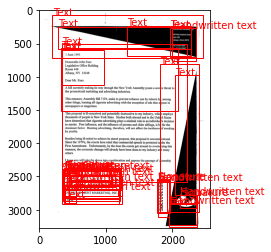

In [ ]:
from detecto.visualize import show_labeled_image
show_labeled_image(image, boxes, labels)

In [ ]:
import numpy as np

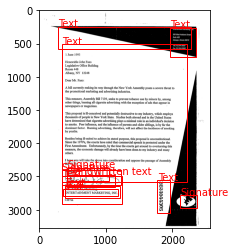

In [ ]:
thresh=0.26
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

In [ ]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760
